In [633]:
import torch
import torchvision
import torch.nn as nn
from torchvision.transforms.v2 import ToTensor  # 转换图像数据为张量
from torchvision.datasets import KMNIST  # 包含 10 个类别的字符
from torch.utils.data import DataLoader  # 数据加载器
import matplotlib.pyplot as plt

In [634]:
train_data_bare = KMNIST(root='../fashion_data', train=True, download=True) # 原始数据

In [635]:
print(train_data_bare)  # Dataset对象（输入数据集合）
print()

print(len(train_data_bare)) #训练集数量
print()

print(train_data_bare.classes) #打印标签
print()

print(len(train_data_bare.classes)) #标签个数
print()

Dataset KMNIST
    Number of datapoints: 60000
    Root location: ../fashion_data
    Split: Train

60000

['o', 'ki', 'su', 'tsu', 'na', 'ha', 'ma', 'ya', 're', 'wo']

10



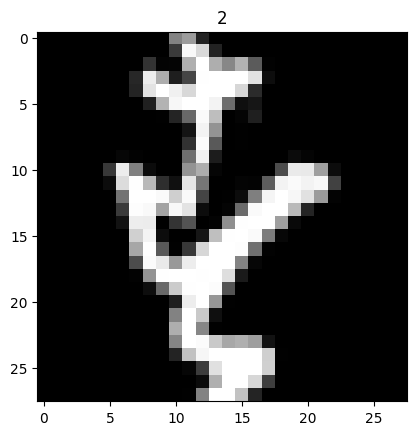

In [636]:
img,clzz = train_data_bare[1314]
plt.imshow(img, cmap='gray')  # img是一个PIL.Image对象(python原始数据)
plt.title(clzz)
plt.show()

In [637]:
# 加载数据集 KMNIST
train_data = KMNIST(root='../fashion_data',         # 数据集保存路径
                          train=True,               # 加载训练集
                          download=True,            # 如果本地没有数据集，则自动下载
                          transform=ToTensor()      # 将图像数据转换为 PyTorch 张量
)

test_data = KMNIST(root='../fashion_data',
                         train=False,               # 加载测试集
                         download=True,
                         transform=ToTensor()
)

In [638]:
print(train_data[1][0].shape) # 图像数据
print(train_data[1][0].reshape(-1).shape) #展平

torch.Size([1, 28, 28])
torch.Size([784])


In [639]:
# 定义超参数
# LR = 1e-3
# LR = 1e-2
# LR = 0.05
# LR = 1e-1
LR = 0.2

EPOCHS = 20
BATCH_SIZE = 128
# BATCH_SIZE = 1234

In [640]:
trian_dl = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)  # shuffle=True表示打乱数据
print(len(trian_dl)) # 分组数

469


In [641]:
# 定义模型
# model = nn.Sequential(
#     nn.Linear(784, 64),
#     nn.Sigmoid(),
#     nn.Linear(64, 10)
# )

# model = nn.Sequential(
#     nn.Linear(784, 128),
#     nn.Sigmoid(),
#     nn.Linear(128, 10)
# )

# model = nn.Sequential(
#     nn.Linear(784, 32),
#     nn.Sigmoid(),
#     nn.Linear(32, 10)
# )

model = nn.Sequential(
    nn.Linear(784, 512),
    nn.Linear(512, 128),
    nn.Sigmoid(),
    nn.Linear(128, 64),
    nn.Linear(64, 32),
    nn.Linear(32, 10)
)

In [642]:
# 损失函数&优化器
loss_fn = nn.CrossEntropyLoss()  # 交叉熵损失函数
# 优化器（模型参数更新）
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [643]:
for epoch in range(EPOCHS):
    # 提取训练数据
    for data, target in trian_dl:
        # 前向运算
        output = model(data.reshape(-1, 784))
        # 计算损失
        loss = loss_fn(output, target)
        # 反向传播
        optimizer.zero_grad()   # 所有参数梯度清零
        loss.backward()         # 计算梯度（参数.grad）
        optimizer.step()        # 更新参数

    print(f'Epoch:{epoch} Loss: {loss.item()}')

Epoch:0 Loss: 0.7641677856445312
Epoch:1 Loss: 0.6836240291595459
Epoch:2 Loss: 0.4859253466129303
Epoch:3 Loss: 0.20654787123203278
Epoch:4 Loss: 0.23589372634887695
Epoch:5 Loss: 0.2645600736141205
Epoch:6 Loss: 0.20316164195537567
Epoch:7 Loss: 0.20057976245880127
Epoch:8 Loss: 0.11777227371931076
Epoch:9 Loss: 0.1452830284833908
Epoch:10 Loss: 0.13888254761695862
Epoch:11 Loss: 0.05165587365627289
Epoch:12 Loss: 0.13725943863391876
Epoch:13 Loss: 0.10994603484869003
Epoch:14 Loss: 0.0629054605960846
Epoch:15 Loss: 0.20194095373153687
Epoch:16 Loss: 0.021316448226571083
Epoch:17 Loss: 0.08271951973438263
Epoch:18 Loss: 0.07444680482149124
Epoch:19 Loss: 0.07020708918571472


In [645]:
# 测试
test_dl = DataLoader(test_data, batch_size=BATCH_SIZE)

correct = 0
total = 0
with torch.no_grad():  # 不计算梯度
    for data, target in test_dl:
        output = model(data.reshape(-1, 784))
        _, predicted = torch.max(output, 1)  # 返回每行最大值和索引
        total += target.size(0)  # size(0) 等效 shape[0]
        correct += (predicted == target).sum().item()

print(f'Accuracy: {correct/total*100}%')

Accuracy: 85.97%


In [647]:
output

tensor([[ 9.1630e+00, -5.3925e-01, -8.6263e+00, -1.0948e+00,  1.0005e+01,
          9.2034e+00, -5.9073e+00, -8.8471e+00,  8.3021e+00, -1.3588e+01],
        [-2.7705e+00,  2.2280e+01, -4.2754e+00, -8.1214e+00,  1.1126e+00,
         -9.4725e-01,  4.0749e-01, -6.0043e+00, -2.6407e+00,  1.9269e+00],
        [-7.5614e-02, -6.7543e+00,  2.4918e+00, -1.8443e+00, -5.2359e+00,
          1.8338e+01,  2.9285e-01, -4.2096e+00,  3.8239e+00, -6.6895e+00],
        [ 3.0163e+00, -1.8194e+01,  3.6574e+00,  5.1575e+00,  2.5597e+00,
          5.6963e+00, -4.1104e+00,  1.3517e+01, -1.1168e+01,  2.2055e+00],
        [-2.9876e+00,  1.3621e+00, -2.0274e-01,  3.4000e+00, -5.8555e+00,
         -1.2880e+00,  5.3913e-01, -2.0854e+00,  2.9716e+00,  2.9951e+00],
        [ 9.0789e+00, -7.3088e+00, -6.1075e-01, -1.2297e+01, -4.5490e+00,
         -1.1696e+00, -9.7337e+00,  1.1899e+01, -1.0780e+01,  2.7784e+01],
        [-1.1196e+00, -2.0032e+00,  1.0101e+01, -2.3783e+00, -1.5545e+00,
          1.0576e+00, -7.7055e+0

In [648]:
output.shape

torch.Size([16, 10])

In [649]:
predicted

tensor([4, 1, 5, 7, 3, 9, 2, 4, 7, 6, 0, 4, 0, 2, 4, 3])

In [650]:
target

tensor([0, 1, 5, 7, 3, 9, 2, 4, 7, 6, 0, 4, 0, 9, 4, 2])

In [652]:
(predicted == target).int()

tensor([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=torch.int32)

In [653]:
(predicted == target).int().sum()

tensor(13)